In [44]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from fact.io import read_h5py

from astropy.table import QTable
from astropy.io import fits
import astropy.units as u

%matplotlib inline

plt.rcParams['figure.figsize'] = [9, 6]

In [8]:
SIM_VERSION = '20201023_v0.6.3_prod5_local_wo_n_islands'

## Plot intensity distribution

In [3]:
df_gamma_diff = pd.read_hdf(
    f'../simulations/dl1_gamma-diffuse_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_gamma = pd.read_hdf(
    f'../simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_proton = pd.read_hdf(
    f'../simulations/dl1_proton_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)

In [4]:
max_intensity = 1500
df_gamma_diff_selected = df_gamma_diff.query(f'intensity < {max_intensity}')
df_gamma_selected = df_gamma.query(f'intensity < {max_intensity}')
df_proton_selected = df_proton.query(f'intensity < {max_intensity}')

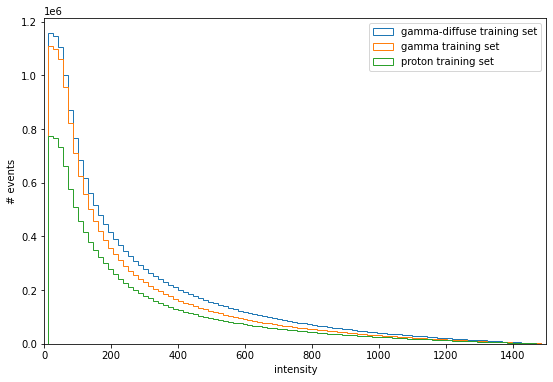

In [5]:
plt.hist(df_gamma_diff_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma-diffuse training set')
plt.hist(df_gamma_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma training set')
plt.hist(df_proton_selected.intensity, bins=100, histtype='step', cumulative=-1, label='proton training set')

plt.xlabel('intensity')
plt.ylabel('# events')
plt.xlim(0, max_intensity)
plt.legend()

## Other packeges

In [6]:
import tables

with tables.open_file(f'../simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5') as f:
    sim_runs = f.root.simulation.run_config[:]

print(*sim_runs.dtype.names)
print(np.sum(sim_runs['num_showers']))

obs_id run_array_direction corsika_version simtel_version energy_range_min energy_range_max prod_site_B_total prod_site_B_declination prod_site_B_inclination prod_site_alt spectral_index shower_prog_start shower_prog_id detector_prog_start detector_prog_id num_showers shower_reuse max_alt min_alt max_az min_az diffuse max_viewcone_radius min_viewcone_radius max_scatter_range min_scatter_range core_pos_mode injection_height atmosphere corsika_iact_options corsika_low_E_model corsika_high_E_model corsika_bunchsize corsika_wlen_min corsika_wlen_max corsika_low_E_detail corsika_high_E_detail
5000000


In [7]:
from pyirf.simulations import SimulatedEventsInfo

SimulatedEventsInfo?
#n_showers = sum(num_showers) oder num_showers*shower_reuse
#max_impact = max_scatter_range
#viewcone = max_viewcone_radius | min_viewcone_radius 


In [8]:
import h5py

with h5py.File(f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5', mode='r') as f:
    print('corsika_runs' in f)

True


## Testing DL2 files

In [9]:
gamma_testing_info = read_h5py(
    f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='corsika_runs'
)
gamma_testing_info.columns

Index(['atmosphere', 'core_pos_mode', 'corsika_bunchsize',
       'corsika_high_E_detail', 'corsika_high_E_model', 'corsika_iact_options',
       'corsika_low_E_detail', 'corsika_low_E_model', 'corsika_version',
       'corsika_wlen_max', 'corsika_wlen_min', 'detector_prog_id',
       'detector_prog_start', 'diffuse', 'energy_range_max',
       'energy_range_min', 'injection_height', 'max_alt', 'max_az',
       'max_scatter_range', 'max_viewcone_radius', 'min_alt', 'min_az',
       'min_scatter_range', 'min_viewcone_radius', 'num_showers', 'obs_id',
       'prod_site_B_declination', 'prod_site_B_inclination',
       'prod_site_B_total', 'prod_site_alt', 'shower_prog_id',
       'shower_prog_start', 'shower_reuse', 'simtel_version',
       'spectral_index'],
      dtype='object')

In [9]:
gamma_testing_events = read_h5py(
    f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='events'
)

In [2]:
run1_dl2 = read_h5py(
    '../build/dl2_v0.6.3_v05_LST-1.Run02922.h5',
    key='events'
)
run2_dl2 = read_h5py(
    '../build/dl2_v0.6.3_v05_LST-1.Run02923.h5',
    key='events'
)
len(run1_dl2.pointing_dec) - len(run1_dl2.pointing_dec.dropna()) 

19

## Comparing different $\theta$ calculations (broken atm)

In [17]:
theta_comp = read_h5py('../build/theta_comparison.h5', key='thetas_compare')

print(np.count_nonzero(np.isnan(theta_comp['camera_frame_on'])))
print(np.count_nonzero(np.isnan(theta_comp['astropy_on'])))
theta_comp

0
0


,astropy_off_1,astropy_off_2,astropy_off_3,astropy_off_4,astropy_off_5,astropy_on,camera_frame_off_1,camera_frame_off_2,camera_frame_off_3,camera_frame_off_4,camera_frame_off_5,camera_frame_on
0,1.645454,1.342926,0.985533,1.021341,1.395411,1.667150,1.645380,1.342871,0.985490,1.021297,1.395357,1.667073
1,1.727160,1.871541,1.698550,1.322107,1.108345,1.358663,1.727098,1.871457,1.698475,1.322044,1.108296,1.358622
2,1.397029,1.062382,1.150713,1.530578,1.779257,1.723442,1.396999,1.062349,1.150659,1.530511,1.779181,1.723385
3,1.745240,1.885607,1.708223,1.330772,1.123097,1.377963,1.745180,1.885523,1.708146,1.330708,1.123048,1.377923
4,2.857059,2.895847,2.612805,2.246022,2.195793,2.525971,2.857116,2.895816,2.612745,2.245993,2.195871,2.526096
...,...,...,...,...,...,...,...,...,...,...,...,...
15482,2.048485,2.165695,1.956900,1.573162,1.407462,1.685718,2.048432,2.165606,1.956811,1.573085,1.407417,1.685693
15483,3.608593,3.482424,3.110871,2.850007,3.002836,3.386252,3.608824,3.482558,3.110999,2.850230,3.003200,3.386607
15484,0.173860,0.210568,0.528535,0.707281,0.697233,0.501121,0.173847,0.210567,0.528517,0.707253,0.697202,0.501098
15485,2.401241,2.067800,1.737381,1.803123,2.177461,2.449235,2.401158,2.067747,1.737325,1.803053,2.177379,2.449135


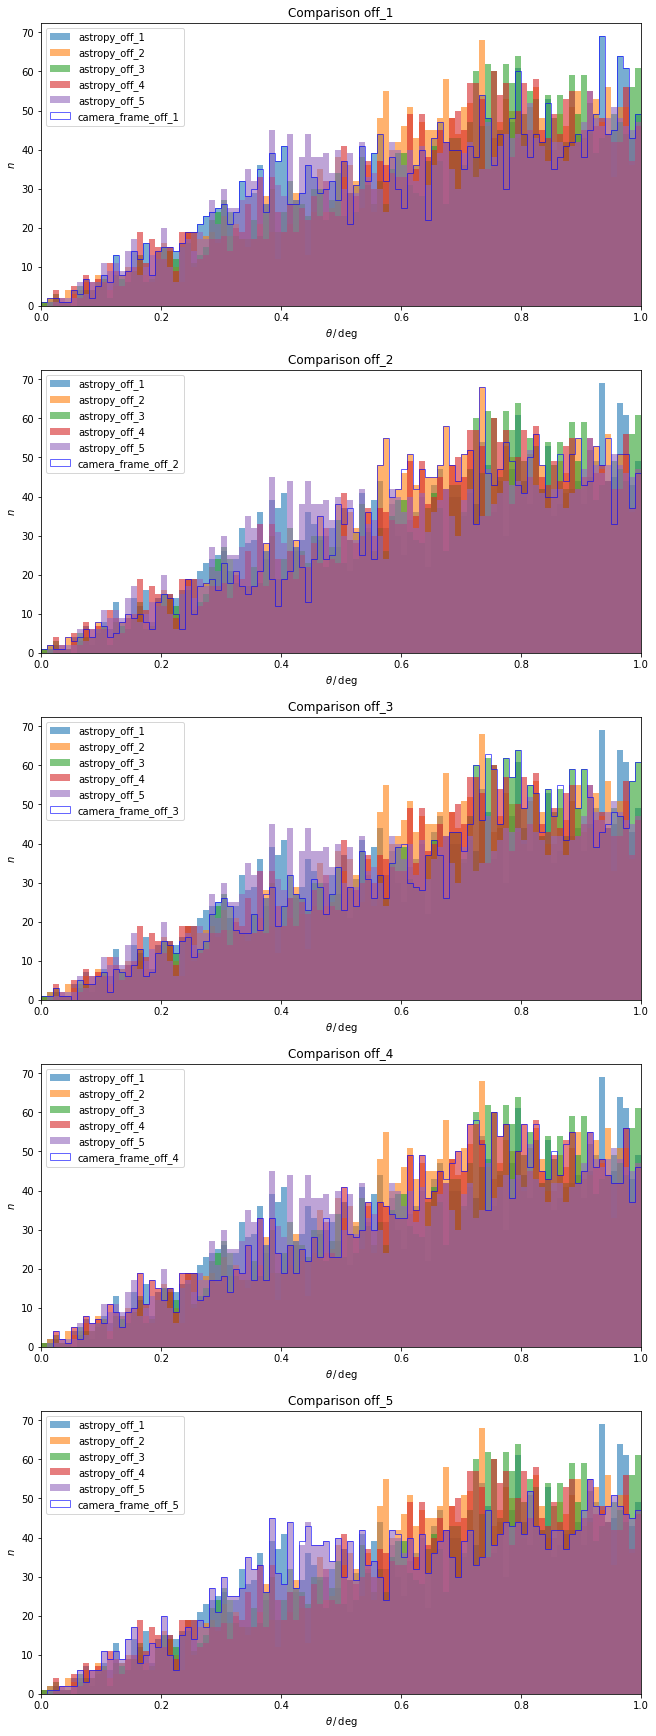

In [18]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(9, 6*4))

offs = ['off_1', 'off_2', 'off_3', 'off_4', 'off_5']

range=[0,1]
for ax, i in zip(axs, offs):
    #n_astropy = len(theta_comp[f'astropy_{i}'].dropna())
    for j in offs:
        ax.hist(
            theta_comp[f'astropy_{j}'], range=range,
            bins=100, histtype='bar', alpha=0.6, 
            label=rf'astropy_{j}'
        )
    #n_camera = len(theta_comp[f'camera_frame_{i}'].dropna())
    ax.hist(
        theta_comp[f'camera_frame_{i}'], range=range,
        bins=100, histtype='step', color='b', alpha=0.6, 
        label=rf'camera_frame_{i}'
    )
    ax.set_xlim(range)
    
    ax.set_xlabel(r'$\theta \,/\, \mathrm{deg}$')
    ax.set_ylabel(r'$n$')
    ax.set_title(f'Comparison {i}')
    ax.legend()
    
fig.savefig('../build/theta_comparison.pdf')

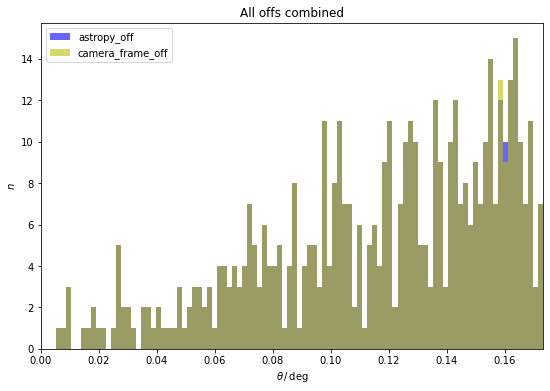

In [19]:
# combine all 5 offs

astropy_off = np.array(
    theta_comp.loc[:, theta_comp.columns.str.startswith('astropy_off')]
).ravel()
camera_frame_off = np.array(
    theta_comp.loc[:, theta_comp.columns.str.startswith('camera_frame_off')]
).ravel()

range=[0, np.sqrt(0.03)]
plt.hist(
    astropy_off, range=range,
    bins=100, histtype='bar', color='b', alpha=0.6, label='astropy_off'
)
plt.hist(
    camera_frame_off, range=range,
    bins=100, histtype='bar', color='y', alpha=0.6, label='camera_frame_off'
)
plt.xlim(range)   
plt.xlabel(r'$\theta \,/\, \mathrm{deg}$')
plt.ylabel(r'$n$')
plt.title('All offs combined')
plt.legend()
None

## Other tests

In [33]:
series1 = pd.Series([1,2,3], name="eins")
series2 = pd.Series([4,5,6], name="zwei")

df = series1.to_frame().join(series2)
df

,eins,zwei
0,1,4
1,2,5
2,3,6


In [18]:
list1 = np.array(
    [[1,2,3,4,5], [6,7,8,9,10]]
)
np.concatenate([list1[:,1]])

array([2, 7])

In [2]:
output = 'build/test/plot.pdf'
output.split('/')[-1]

'plot.pdf'

In [10]:
a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
    names=('a', 'b', 'c', 'd'),
    units=('s', '', '', '')
)

t['b'].unit = u.deg

t

a,b,c,d
s,deg,,m / s
float64,float64,str1,float64
1.0,2.0,x,10.0
4.0,5.0,y,20.0
5.0,8.5,z,30.0
